In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, datasets, models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

import numpy as np
from os import listdir
from skimage import io, color, transform
from sklearn.metrics import confusion_matrix
from skimage.color.colorconv import rgba2rgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
from sklearn.metrics import classification_report
import cv2

from keras.models import model_from_json


In [2]:
doc = "C:/Users/au_wa/Downloads/IS_CNN2"

from google.colab import drive

drive.mount('/content/drive')
doc ="/content/drive/MyDrive/IS_CNN2"

In [3]:
listDir = listdir(doc)
print(listDir)
print(len(listDir))

['House', 'Other']
2


In [4]:
filehouse= doc+"/" +listDir[0]
fileOther= doc+"/"+listDir[1]
print(len(listdir(filehouse)))
print(len(listdir(fileOther)))

332
200


In [5]:
Class = 'House','Other'
def getImage (Class, fileName):
  filesdoc= doc+'/'+Class+'/'+str(fileName)
  img = io.imread(filesdoc)
  print(img.dtype)
  img = transform.resize(img,(150,150))
  print(img.dtype)
  if img.shape == (150,150,4) :
     img=color.rgba2rgb(img)
     return img

  else : return img

In [6]:
X = []
label = []
print(listDir[0])


House


In [7]:
for j in range(len(listDir)):
  fileDir = doc+"/"+listDir[j]
  listFile = listdir(fileDir)
  for i in range(len(listFile)):
    filename = listFile[i]
    img= getImage(listDir[j],filename)
    X.append(img)
    print(X[i].dtype)
    label.append(j)
    augimg=np.fliplr(img)
    X.append(augimg)
    label.append(j)  
    augimg1 = transform.rotate(img,90)
    augimg2 = transform.rotate(img,180)
    augimg3 = transform.rotate(img,270)
    X.append(augimg1)
    X.append(augimg2)
    X.append(augimg3)
    label.append(j)
    label.append(j)
    label.append(j)

uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
floa

float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
float64
uint8
float64
fl

In [8]:
print(len(X))
print(len(label))

2660
2660


0
[[[0.49019335 0.47842864 0.4588208 ]
  [0.44917341 0.4374087  0.41780086]
  [0.51059035 0.49882564 0.4792178 ]
  ...
  [0.91162414 0.76787644 0.75469418]
  [0.83704278 0.68342564 0.67405826]
  [0.69854793 0.53380559 0.52757216]]

 [[0.46657704 0.45481234 0.43520449]
  [0.47221022 0.46044551 0.44083767]
  [0.50878488 0.49702017 0.47741233]
  ...
  [0.90841395 0.78481177 0.77359148]
  [0.87068168 0.74049811 0.73107893]
  [0.78168476 0.63505563 0.63109329]]

 [[0.44214071 0.43037601 0.41076816]
  [0.48415569 0.47239099 0.45278314]
  [0.50836636 0.49660165 0.47699381]
  ...
  [0.8670701  0.77243063 0.75690745]
  [0.87741105 0.77822506 0.76277322]
  [0.87660453 0.76113135 0.7520217 ]]

 ...

 [[0.32703211 0.41266912 0.26396826]
  [0.32457122 0.41020824 0.26150738]
  [0.21680706 0.30244408 0.15374322]
  ...
  [0.19356792 0.2719993  0.12690126]
  [0.26011754 0.33854892 0.19345088]
  [0.26788346 0.34631483 0.20121679]]

 [[0.31054302 0.38868133 0.24367326]
  [0.25976317 0.33790149 0.19289341

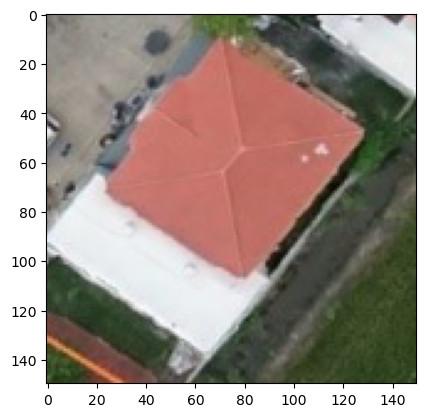

In [9]:
plt.imshow(X[0])
print(label[0])
print(X[0])
print(X[0].dtype)

1


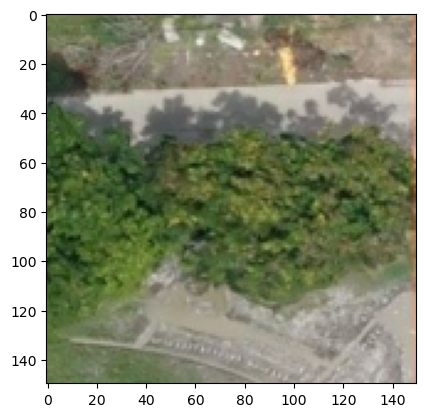

In [10]:
plt.imshow(X[2158])
print(label[2158])

In [11]:
print(X[0])


[[[0.49019335 0.47842864 0.4588208 ]
  [0.44917341 0.4374087  0.41780086]
  [0.51059035 0.49882564 0.4792178 ]
  ...
  [0.91162414 0.76787644 0.75469418]
  [0.83704278 0.68342564 0.67405826]
  [0.69854793 0.53380559 0.52757216]]

 [[0.46657704 0.45481234 0.43520449]
  [0.47221022 0.46044551 0.44083767]
  [0.50878488 0.49702017 0.47741233]
  ...
  [0.90841395 0.78481177 0.77359148]
  [0.87068168 0.74049811 0.73107893]
  [0.78168476 0.63505563 0.63109329]]

 [[0.44214071 0.43037601 0.41076816]
  [0.48415569 0.47239099 0.45278314]
  [0.50836636 0.49660165 0.47699381]
  ...
  [0.8670701  0.77243063 0.75690745]
  [0.87741105 0.77822506 0.76277322]
  [0.87660453 0.76113135 0.7520217 ]]

 ...

 [[0.32703211 0.41266912 0.26396826]
  [0.32457122 0.41020824 0.26150738]
  [0.21680706 0.30244408 0.15374322]
  ...
  [0.19356792 0.2719993  0.12690126]
  [0.26011754 0.33854892 0.19345088]
  [0.26788346 0.34631483 0.20121679]]

 [[0.31054302 0.38868133 0.24367326]
  [0.25976317 0.33790149 0.19289341]


In [12]:
print(X[1])

[[[0.69854793 0.53380559 0.52757216]
  [0.83704278 0.68342564 0.67405826]
  [0.91162414 0.76787644 0.75469418]
  ...
  [0.51059035 0.49882564 0.4792178 ]
  [0.44917341 0.4374087  0.41780086]
  [0.49019335 0.47842864 0.4588208 ]]

 [[0.78168476 0.63505563 0.63109329]
  [0.87068168 0.74049811 0.73107893]
  [0.90841395 0.78481177 0.77359148]
  ...
  [0.50878488 0.49702017 0.47741233]
  [0.47221022 0.46044551 0.44083767]
  [0.46657704 0.45481234 0.43520449]]

 [[0.87660453 0.76113135 0.7520217 ]
  [0.87741105 0.77822506 0.76277322]
  [0.8670701  0.77243063 0.75690745]
  ...
  [0.50836636 0.49660165 0.47699381]
  [0.48415569 0.47239099 0.45278314]
  [0.44214071 0.43037601 0.41076816]]

 ...

 [[0.26788346 0.34631483 0.20121679]
  [0.26011754 0.33854892 0.19345088]
  [0.19356792 0.2719993  0.12690126]
  ...
  [0.21680706 0.30244408 0.15374322]
  [0.32457122 0.41020824 0.26150738]
  [0.32703211 0.41266912 0.26396826]]

 [[0.15455973 0.2329911  0.08789306]
  [0.19896843 0.2773998  0.13230176]


In [13]:
houseAR= np.array(X)
labelAR=np.array(label)

In [14]:
train_img, test_img,train_label,test_label = train_test_split(houseAR, labelAR, test_size=0.20, random_state=1)


In [15]:
print(train_label.shape)
print(train_label[1])


(2128,)
1


In [16]:
train_label=np_utils.to_categorical(train_label)
test_label=np_utils.to_categorical(test_label)
num_class=train_label.shape[1]
print(num_class)
print(train_label.shape)

2
(2128, 2)


In [17]:
int_array = train_label.astype(int)

In [18]:
print(train_img.shape)
print(test_img.shape)

(2128, 150, 150, 3)
(532, 150, 150, 3)


In [19]:
print(int_array.shape)
print(train_label.shape)

(2128, 2)
(2128, 2)


Test

[[[0.75266298 0.71973206 0.66083139]
  [0.7372996  0.70596406 0.65487266]
  [0.71550845 0.68422082 0.6332282 ]
  ...
  [0.53508788 0.56251153 0.43874884]
  [0.49523862 0.5226896  0.39326068]
  [0.47884847 0.50629945 0.37394563]]

 [[0.69521767 0.66358571 0.61208398]
  [0.75652881 0.72516039 0.67420753]
  [0.74635515 0.71999738 0.67152446]
  ...
  [0.5005753  0.52802632 0.3992413 ]
  [0.49735153 0.52481547 0.39199351]
  [0.4617652  0.48922972 0.35585824]]

 [[0.60710112 0.57713515 0.52939582]
  [0.69420714 0.66691733 0.62168336]
  [0.7125251  0.68766152 0.6433724 ]
  ...
  [0.46855565 0.49407323 0.36098643]
  [0.48490793 0.51226712 0.36934065]
  [0.45553263 0.48297609 0.33595859]]

 ...

 [[0.63415222 0.61058516 0.56354516]
  [0.65335436 0.62174652 0.57872198]
  [0.67844005 0.63365328 0.58886831]
  ...
  [0.47198938 0.52634169 0.48992244]
  [0.17094464 0.23558653 0.19638033]
  [0.11802378 0.18468322 0.1454799 ]]

 [[0.56966366 0.5460966  0.4990566 ]
  [0.60464254 0.57303469 0.53001015]


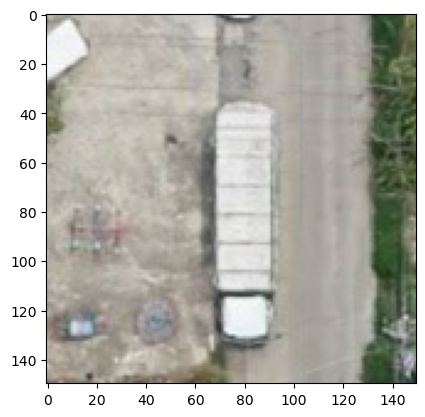

In [20]:
print(train_img[0])
plt.imshow(train_img[0])
print(train_label[0])
print(train_img[0].shape)
print(np.argmax(train_label[0]))

[0. 1.]
1


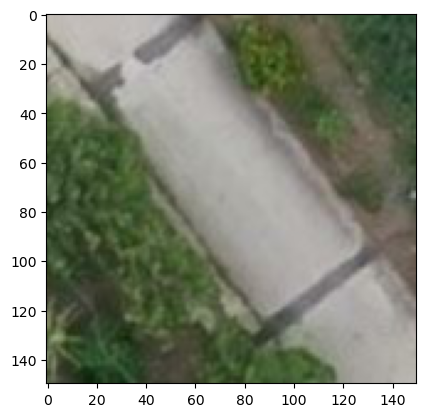

In [21]:
plt.imshow(train_img[841])
print(train_label[841])
print(np.argmax(train_label[841]))

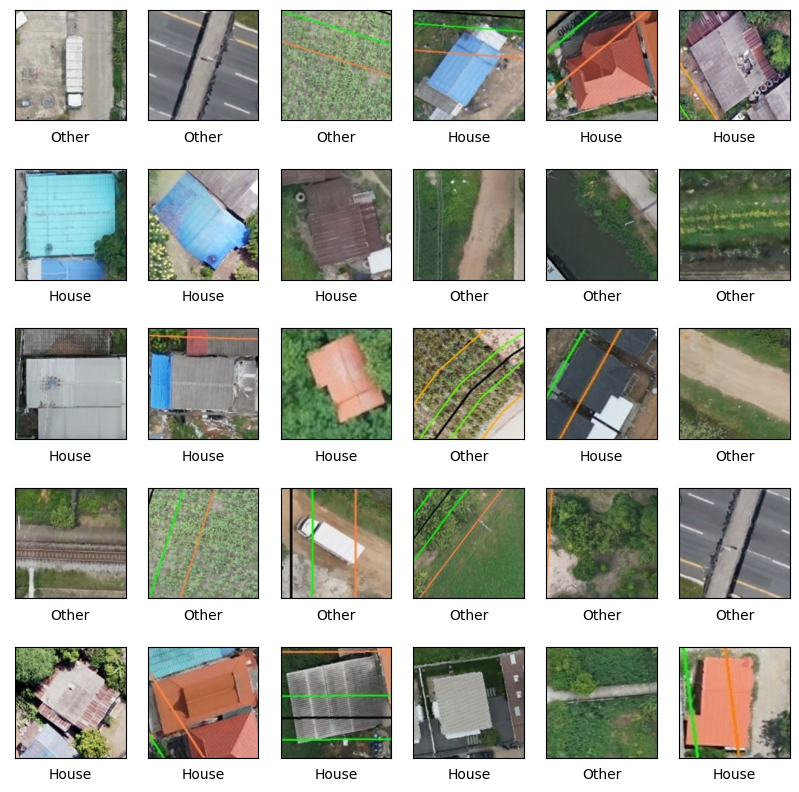

In [22]:
class_names = ['Other', 'House']

plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[int_array[i][0]])
plt.show()

In [23]:
model816= models.Sequential()
model816.add(layers.Conv2D(8, kernel_size=(4,4),strides=(2,2), input_shape=(150,150,3)))
model816.add(layers.Conv2D(8, kernel_size=(4,4),strides=(2,2)))
model816.add(layers.MaxPool2D(pool_size=(2, 2), strides=1))
model816.add(layers.Conv2D(16, kernel_size=(4,4),strides=(2,2)))

model816.add(layers.MaxPool2D(pool_size=(2, 2), strides=1))
model816.add(layers.Flatten())

In [24]:
model816.add(layers.Dense(40))
model816.add(layers.Dense(20))
model816.add(layers.Dense(2, activation='softmax'))

In [25]:
model816.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 74, 74, 8)         392       
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 8)         1032      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        2064      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3600)              0

In [26]:
model816.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),metrics=['accuracy'])

history = model816.fit(train_img, train_label, epochs=20, validation_split=0.2)

Epoch 1/20
54/54 [==============================] - 3s 44ms/step - loss: 21280.6582 - accuracy: 0.4900 - val_loss: 453.7409 - val_accuracy: 0.3568
Epoch 2/20
54/54 [==============================] - 2s 40ms/step - loss: 89.0445 - accuracy: 0.6945 - val_loss: 7.2251 - val_accuracy: 0.8239
Epoch 3/20
54/54 [==============================] - 2s 42ms/step - loss: 1.6427 - accuracy: 0.9001 - val_loss: 0.6537 - val_accuracy: 0.9202
Epoch 4/20
54/54 [==============================] - 2s 42ms/step - loss: 0.8702 - accuracy: 0.9083 - val_loss: 0.4462 - val_accuracy: 0.9272
Epoch 5/20
54/54 [==============================] - 2s 44ms/step - loss: 0.4362 - accuracy: 0.9318 - val_loss: 1.0481 - val_accuracy: 0.8638
Epoch 6/20
54/54 [==============================] - 2s 42ms/step - loss: 0.5076 - accuracy: 0.9207 - val_loss: 0.7228 - val_accuracy: 0.9202
Epoch 7/20
54/54 [==============================] - 2s 41ms/step - loss: 0.3159 - accuracy: 0.9360 - val_loss: 0.2826 - val_accuracy: 0.9531
Epoch 

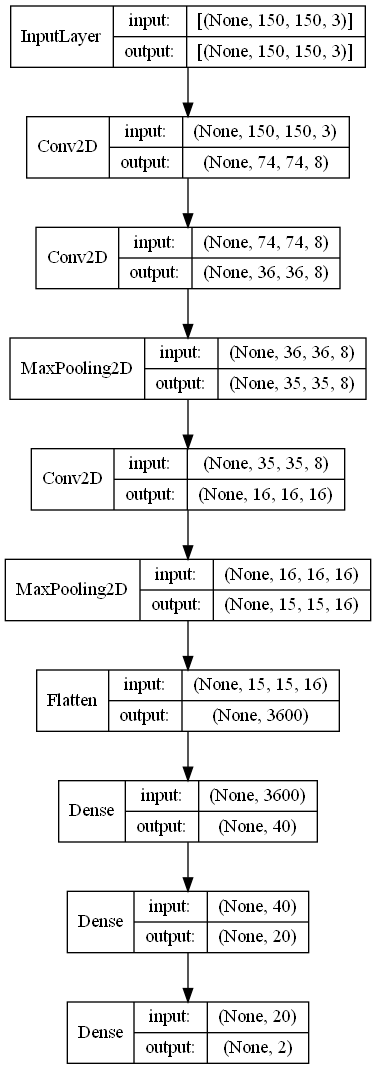

In [27]:
tf.keras.utils.plot_model(model816, to_file='model.png', show_shapes=True, show_layer_names=False)

17/17 - 0s - loss: 0.1577 - accuracy: 0.9436 - 173ms/epoch - 10ms/step


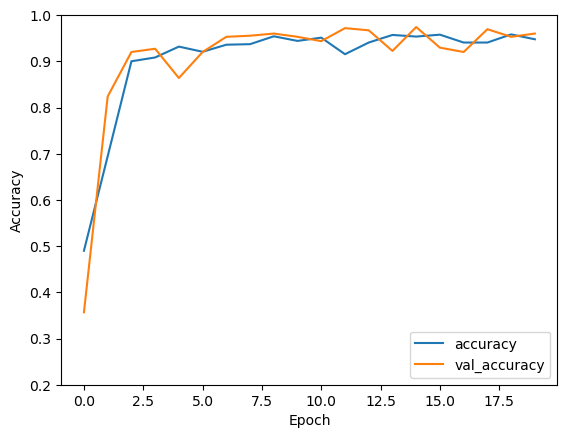

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model816.evaluate(test_img,  test_label, verbose=2)

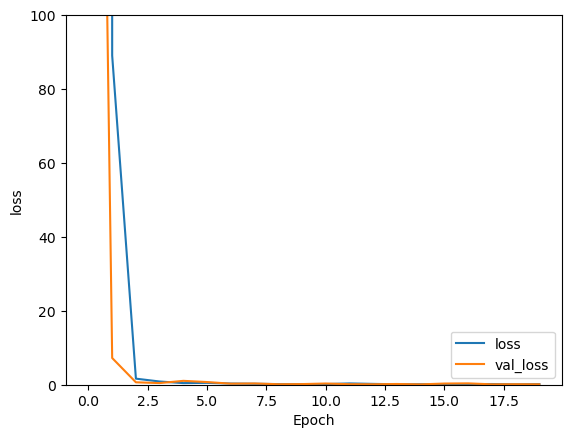

In [29]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0,100])
plt.legend(loc='lower right')

In [30]:
print(test_acc)

0.9436089992523193


In [31]:
label_pred=model816.predict(test_img)

In [32]:
print(label_pred)

[[1.0000000e+00 6.0111308e-16]
 [9.9754578e-01 2.4541821e-03]
 [1.0000000e+00 3.6146104e-16]
 ...
 [7.0874845e-18 1.0000000e+00]
 [1.2793754e-08 1.0000000e+00]
 [1.5581152e-06 9.9999845e-01]]


In [33]:
print(test_label)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [34]:
Label_pred_dec = []
for i in range (len(label_pred)) :
     X= np.argmax(label_pred[i])
     Label_pred_dec.append(X)

In [35]:
print(Label_pred_dec)

[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [36]:
label_pred_round = np.round(label_pred)

In [37]:
print(label_pred_round)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [38]:

print(classification_report(y_true=test_label, y_pred = label_pred_round))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       335
           1       0.87      0.99      0.93       197

   micro avg       0.94      0.94      0.94       532
   macro avg       0.93      0.95      0.94       532
weighted avg       0.95      0.94      0.94       532
 samples avg       0.94      0.94      0.94       532



In [39]:
print(label_pred[1])

[0.9975458  0.00245418]


In [40]:
Label_test_dec = []
for i in range (len(test_label)) :
     X= np.argmax(test_label[i])
     Label_test_dec.append(X)

In [41]:
print(confusion_matrix(y_true=Label_test_dec, y_pred = Label_pred_dec, labels =[0,1]))

[[307  28]
 [  2 195]]


In [42]:
for i in range(len(model816.layers)):
    layer = model816.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

0 conv2d (None, 74, 74, 8)
1 conv2d_1 (None, 36, 36, 8)
3 conv2d_2 (None, 16, 16, 16)


In [43]:
model0 = Model( inputs= model816.inputs, outputs = model816.layers[0].output)
model1 = Model( inputs= model816.inputs, outputs = model816.layers[1].output)
model3 = Model( inputs= model816.inputs, outputs = model816.layers[3].output)
model4 = Model( inputs= model816.inputs, outputs = model816.layers[4].output)
feature_map0 = model0.predict(houseAR[1].reshape(1,150,150,3))
feature_map1 = model1.predict(houseAR[1].reshape(1,150,150,3))
feature_map3 = model3.predict(houseAR[1].reshape(1,150,150,3))
feature_map4 = model4.predict(houseAR[1].reshape(1,150,150,3))

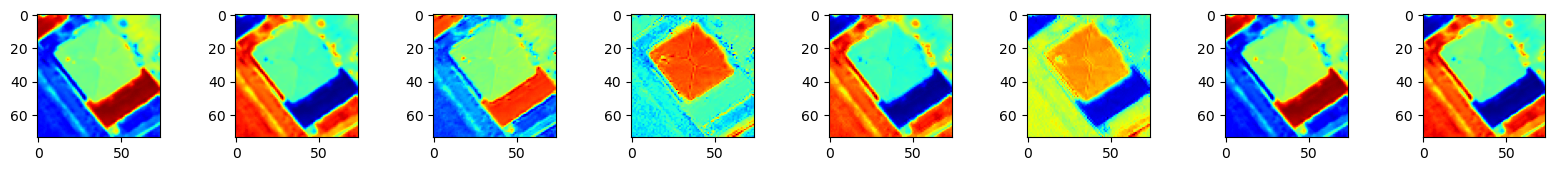

In [44]:
fig = plt.figure(figsize=(20,15))
for i in range(1,feature_map0.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(feature_map0[0,:,:,i-1] ,cmap='jet')
    
plt.show()

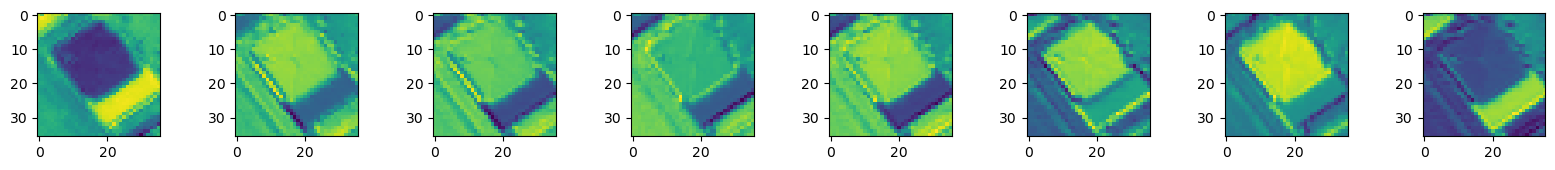

In [45]:
fig = plt.figure(figsize=(20,15))
for i in range(1,feature_map1.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(feature_map1[0,:,:,i-1] )
    
plt.show()

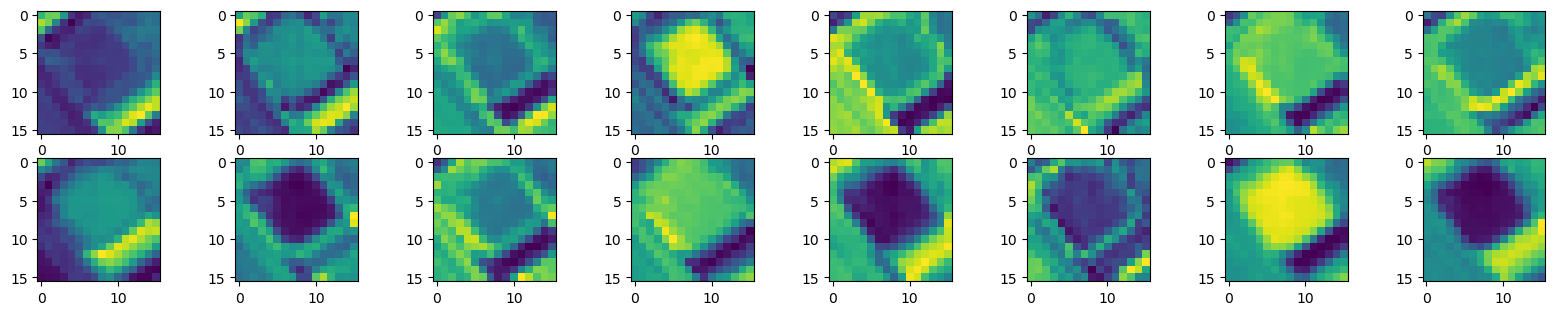

In [46]:
fig = plt.figure(figsize=(20,15))
for i in range(1,feature_map3.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(feature_map3[0,:,:,i-1] )
    
plt.show()